In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import itertools

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("/content/Daylio_Abid.csv")
print(df.shape)
df.head().style.set_properties(**{'background-color':'LightPurple',
                                     'color': 'black'})

(940, 7)


,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | meditation | shower | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | travel | cleaning | new things | power nap | Documentary | penpal | coding,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting | walk | meditation | shower | Audio books | writing | Watching series | good meal | reddit | language learning | shave | streaming | youtube | cooking | cleaning | research | new things | power nap | repair | Documentary | penpal | coding | Tutorial,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Quran | walk | meditation | shower | podcast | Audio books | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | research | new things | designing | repair | Documentary | penpal | coding | Tutorial,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting | walk | meditation | Audio books | writing | Watching series | News Update | good meal | reddit | language learning | shave | streaming | youtube | cooking | research | new things | power nap | Documentary | penpal | coding | Tutorial,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | meditation | shower | writing | Watching series | good meal | reddit | language learning | streaming | youtube | cooking | cleaning | research | new things | power nap | Documentary | penpal | coding | Tutorial,Awful


In [ ]:
df.isnull().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

In [ ]:
df["sub_mood"].value_counts()

blessed           174
focused           111
yolo              100
excited            91
confused           64
wondering          64
hungry             53
Cool               37
over the moon      34
weak               31
Chill              30
worried            28
meh                27
good               19
triggered          18
angry              16
sad af             13
scared              9
sick                8
happiest day        5
awful               4
bad                 4
Name: sub_mood, dtype: int64

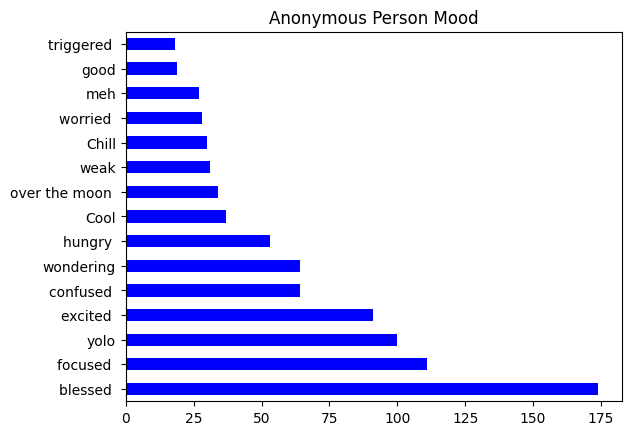

In [ ]:
df["sub_mood"].value_counts()[:15].plot.barh(color='Blue', title='Anonymous Person Mood');

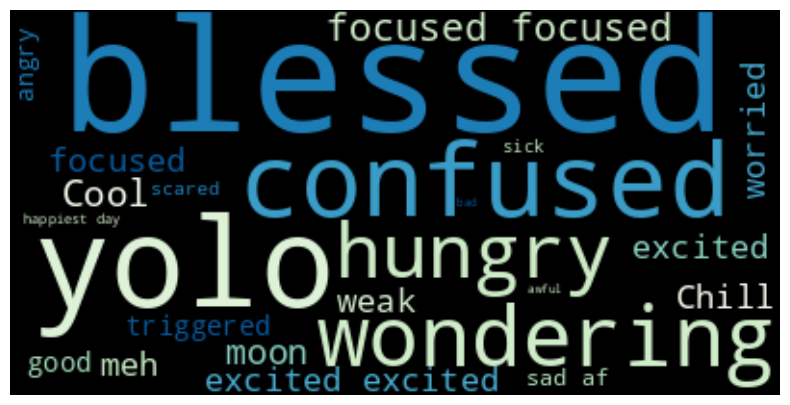

<Figure size 600x400 with 0 Axes>

In [ ]:

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.sub_mood)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(6,4))
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(7,7))
plt.show()

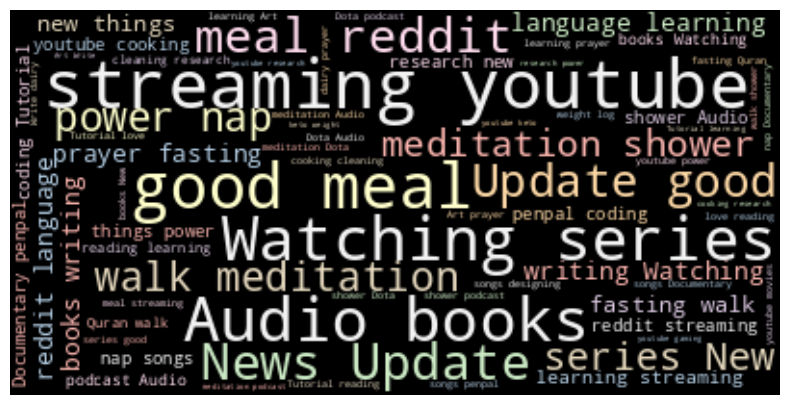

<Figure size 600x400 with 0 Axes>

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.activities)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Pastel1', background_color="black").generate(text)
plt.figure(figsize=(6,4))
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(7,7))
plt.show()

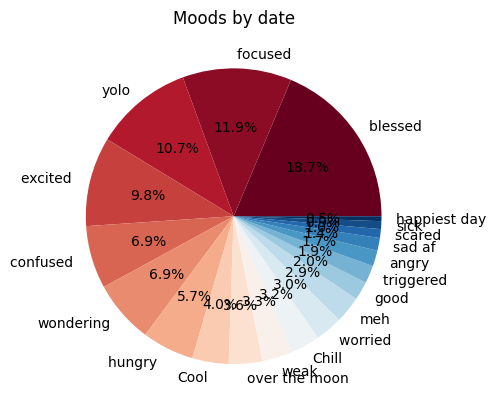

In [ ]:
color = plt.cm.RdBu(np.linspace(0,1,20))
df["sub_mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Moods by date")
plt.axis("off")
plt.show()

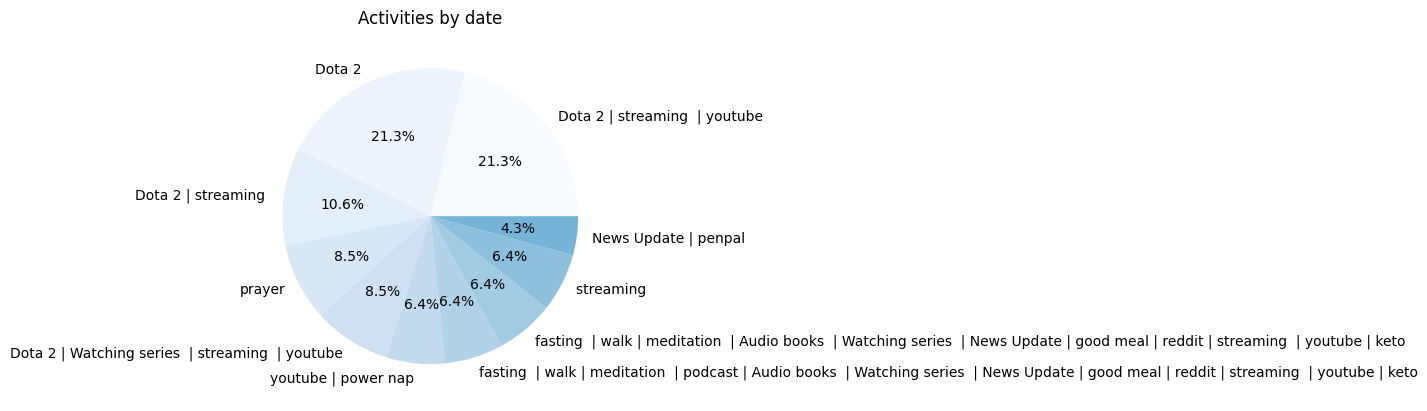

In [ ]:
color = plt.cm.Blues(np.linspace(0,1,20))
df["activities"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Activities by date")
plt.axis("off")
plt.show()

In [ ]:
fig = px.bar(df, x= "date", y= "sub_mood", color_discrete_sequence=['crimson'], title="Daily Mood")
fig.show()

In [ ]:
fig = px.bar(df, x= "weekday", y= "sub_mood", color_discrete_sequence=['#2B3A67'], title="Mood by Weekday")
fig.show()

In [ ]:
fig = px.bar(df, x= "time", y= "sub_mood", color_discrete_sequence=['#2B3A67'], title="Mood by time")
fig.show()

In [ ]:
fig = px.bar(df, x= "time", y= "activities", color_discrete_sequence=['darksalmon'], title="Activities by time")
fig.show()

In [ ]:
fig = px.bar(df, x= "weekday", y= "activities", color_discrete_sequence=['darksalmon'], title="Activities by Weekday")
fig.show()


In [ ]:
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['activities']


In [ ]:
for feature in categorical_nan:
    df[feature] = df[feature].fillna('None')

In [ ]:
df[categorical_nan].isna().sum()

activities    0
dtype: int64

In [ ]:
TARGET = 'activities'

In [ ]:
label_cols = ['full_date', 'weekday', 'time', 'mood']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(c):
    le = LabelEncoder()
    return le.fit_transform(c)

label_encoded_df = df[label_cols].apply(label_encoder)
#numerical_df = df[numerical_cols]
target_df = df[TARGET]

df = pd.concat([label_encoded_df, target_df], axis=1)

In [ ]:
df.head()

,full_date,weekday,time,mood,activities
0,400,0,330,3,reading | Art | prayer | fasting | walk | med...
1,376,4,215,3,reading | learning | Art | prayer | fasting ...
2,352,6,218,4,reading | learning | prayer | fasting | Qura...
3,327,5,217,4,reading | learning | Art | prayer | fasting ...
4,303,1,415,1,reading | learning | fasting | walk | medita...


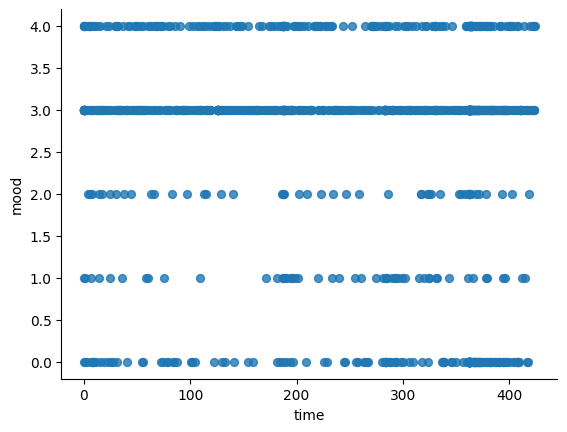

In [ ]:
# @title time vs mood

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='time', y='mood', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = px.treemap(df, path=['mood'], values='weekday',
                  color='time', hover_data=['activities'],title="Mood Tracker",
                  color_continuous_scale='RdBu')
fig.show()